# Imports

In [1]:
import os
import numpy as np
import pandas as pd
from sys import path
from copy import copy, deepcopy
import warnings
warnings.filterwarnings("ignore")

## Directories

In [2]:
model_dir = '../sample_code_submission/'
result_dir = '../sample_result_submission/' 
problem_dir = '../ingestion_program/'  
score_dir = '../scoring_program/'
visualizer_dir = '../visualize/'

### Add directories to path

In [3]:
path.append(model_dir) 
path.append(problem_dir)
path.append(score_dir)
path.append("../")
path.append(visualizer_dir)


**Imports**

In [4]:
# from data_loader import get_settings_from_json
from datagen_temp import DataGenerator
from ingestion import Ingestion
from visualise import *

In [5]:
# Init Ingestion
ingestion = Ingestion()

# Start timer
ingestion.start_timer()


In [6]:


# load test set
ingestion.load_train_set()

# load test set
ingestion.load_test_sets()


[*] Loading Train data
[*] Loading Test data


## Visualise Data 

In [7]:
Train_data_vis = Dataset_visualise(ingestion.train_set["data"],ingestion.train_set["weights"],ingestion.train_set["labels"],"Train Set")

In [8]:
Train_data_vis.examine_dataset()

[*] --- Dataset name : Train Set
[*] --- List of all features


Index(['PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_electron_flag',
       'PRI_muon_flag', 'PRI_had_pt', 'PRI_had_eta', 'PRI_had_phi',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_n_jets', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'PRI_met', 'PRI_met_phi',
       'DER_mass_transverse_lep_had', 'DER_mass_vis', 'DER_pt_h',
       'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet',
       'DER_deltar_lep_had', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_had', 'DER_mass_transverse_met_lep',
       'DER_deltar_had_lep', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality'],
      dtype='object')

[*] --- Examples of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
0,24.4587,-0.938924,-2.545490,1,0,47.0797,-1.568530,-0.017673,75.1804,-3.886850,...,748.451916,-3.992883,2.60504,3.567764,247.7554,0.519517,7.312419,2.605046,1.321357,0.960876
1,32.6187,0.274905,1.002230,0,1,40.1061,1.611880,-2.548060,40.1061,1.611880,...,48.126646,1.127857,3.04241,38.568640,143.8136,0.813310,3.573415,3.042403,0.556837,0.023982
2,22.5826,0.557992,2.992250,0,1,52.3980,-0.443587,-0.049800,52.3980,-0.443587,...,57.084057,0.826119,3.20269,44.440963,150.9889,0.430982,0.792971,3.202691,1.161084,0.002976
3,28.0183,-1.976490,-0.873633,0,1,40.1471,-2.319930,2.218170,40.1471,-2.319930,...,-7.000000,-7.000000,3.11082,43.452083,68.1654,0.697891,4.696450,3.110819,1.410007,-7.000000
4,25.6516,-1.514260,-2.574530,1,0,41.6939,-0.153836,0.590890,41.6939,-0.153836,...,-7.000000,-7.000000,3.40165,36.999725,67.3455,0.615236,2.555270,3.401649,-1.404078,-7.000000


[*] --- Description of all features


,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_electron_flag,PRI_muon_flag,PRI_had_pt,PRI_had_eta,PRI_had_phi,PRI_jet_leading_pt,PRI_jet_leading_eta,...,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_lep_had,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_had,DER_mass_transverse_met_lep,DER_deltar_had_lep,DER_met_phi_centrality,DER_lep_eta_centrality
count,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,...,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000,169054.000000
mean,33.487333,0.001755,0.002035,0.448312,0.551688,44.392545,0.003846,0.002453,67.885947,0.005216,...,144.186432,-2.655921,2.588853,53.339815,174.231211,0.871615,20.576307,2.588853,0.493618,-2.594537
std,17.852515,1.189970,1.813521,0.497323,0.497323,23.594699,1.217697,1.814532,59.013327,1.559063,...,275.204655,4.263652,0.711219,37.249712,142.300642,0.548038,20.134547,0.711219,1.117670,3.642146
min,20.000100,-2.499920,-3.141310,0.000000,0.000000,22.917500,-2.663630,-3.141570,22.939800,-4.857170,...,-7.000000,-21.173279,0.575897,0.186226,43.072100,0.045180,0.000458,0.575889,-1.414214,-7.000000
25%,23.820500,-0.900651,-1.566015,0.000000,0.000000,30.973625,-0.935809,-1.573915,35.518375,-1.126830,...,-7.000000,-7.000000,2.152770,33.065039,69.623925,0.547497,5.801560,2.152767,-0.681169,-7.000000
50%,28.628100,-0.003970,0.003435,0.000000,1.000000,38.713600,0.011982,0.014692,46.508400,0.014025,...,70.794485,-1.877603,2.843935,45.900727,139.240550,0.752960,14.325799,2.843940,1.124888,0.000002
75%,36.439225,0.905926,1.574078,1.000000,1.000000,49.373250,0.939318,1.573555,73.210900,1.134165,...,179.443566,0.477032,3.106797,62.701193,222.311900,1.035609,29.886796,3.106797,1.380452,0.463105
max,571.632000,2.499990,3.141570,1.000000,1.000000,673.323000,2.682640,3.141550,1575.320000,4.919970,...,6865.710623,18.746176,5.777640,1143.009736,2869.378200,13.694428,555.207055,5.777639,1.414214,1.000000


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

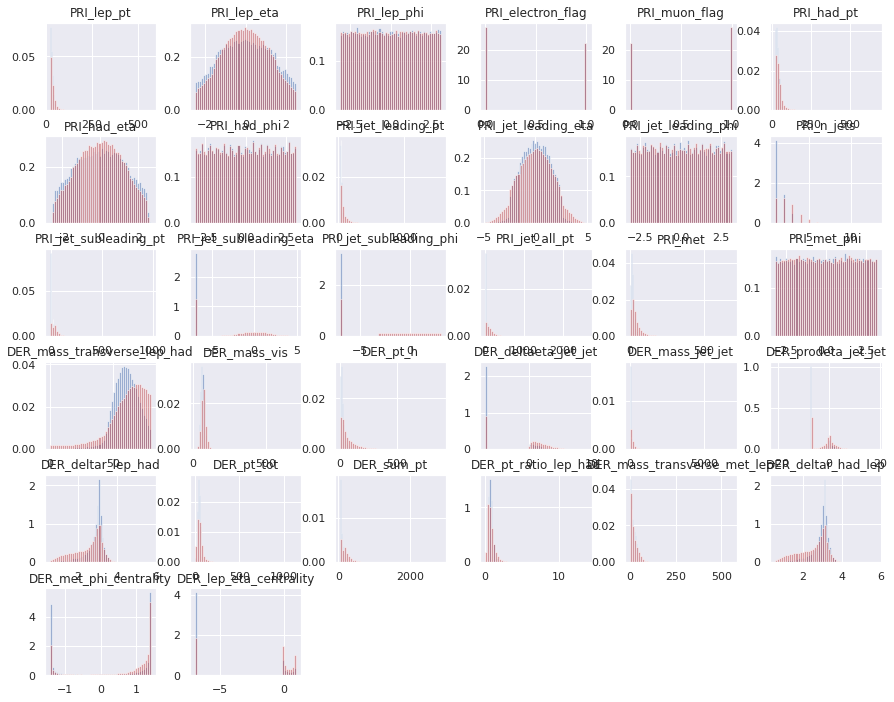

In [9]:
Train_data_vis.histogram_dataset()

Signal feature  correlation matrix


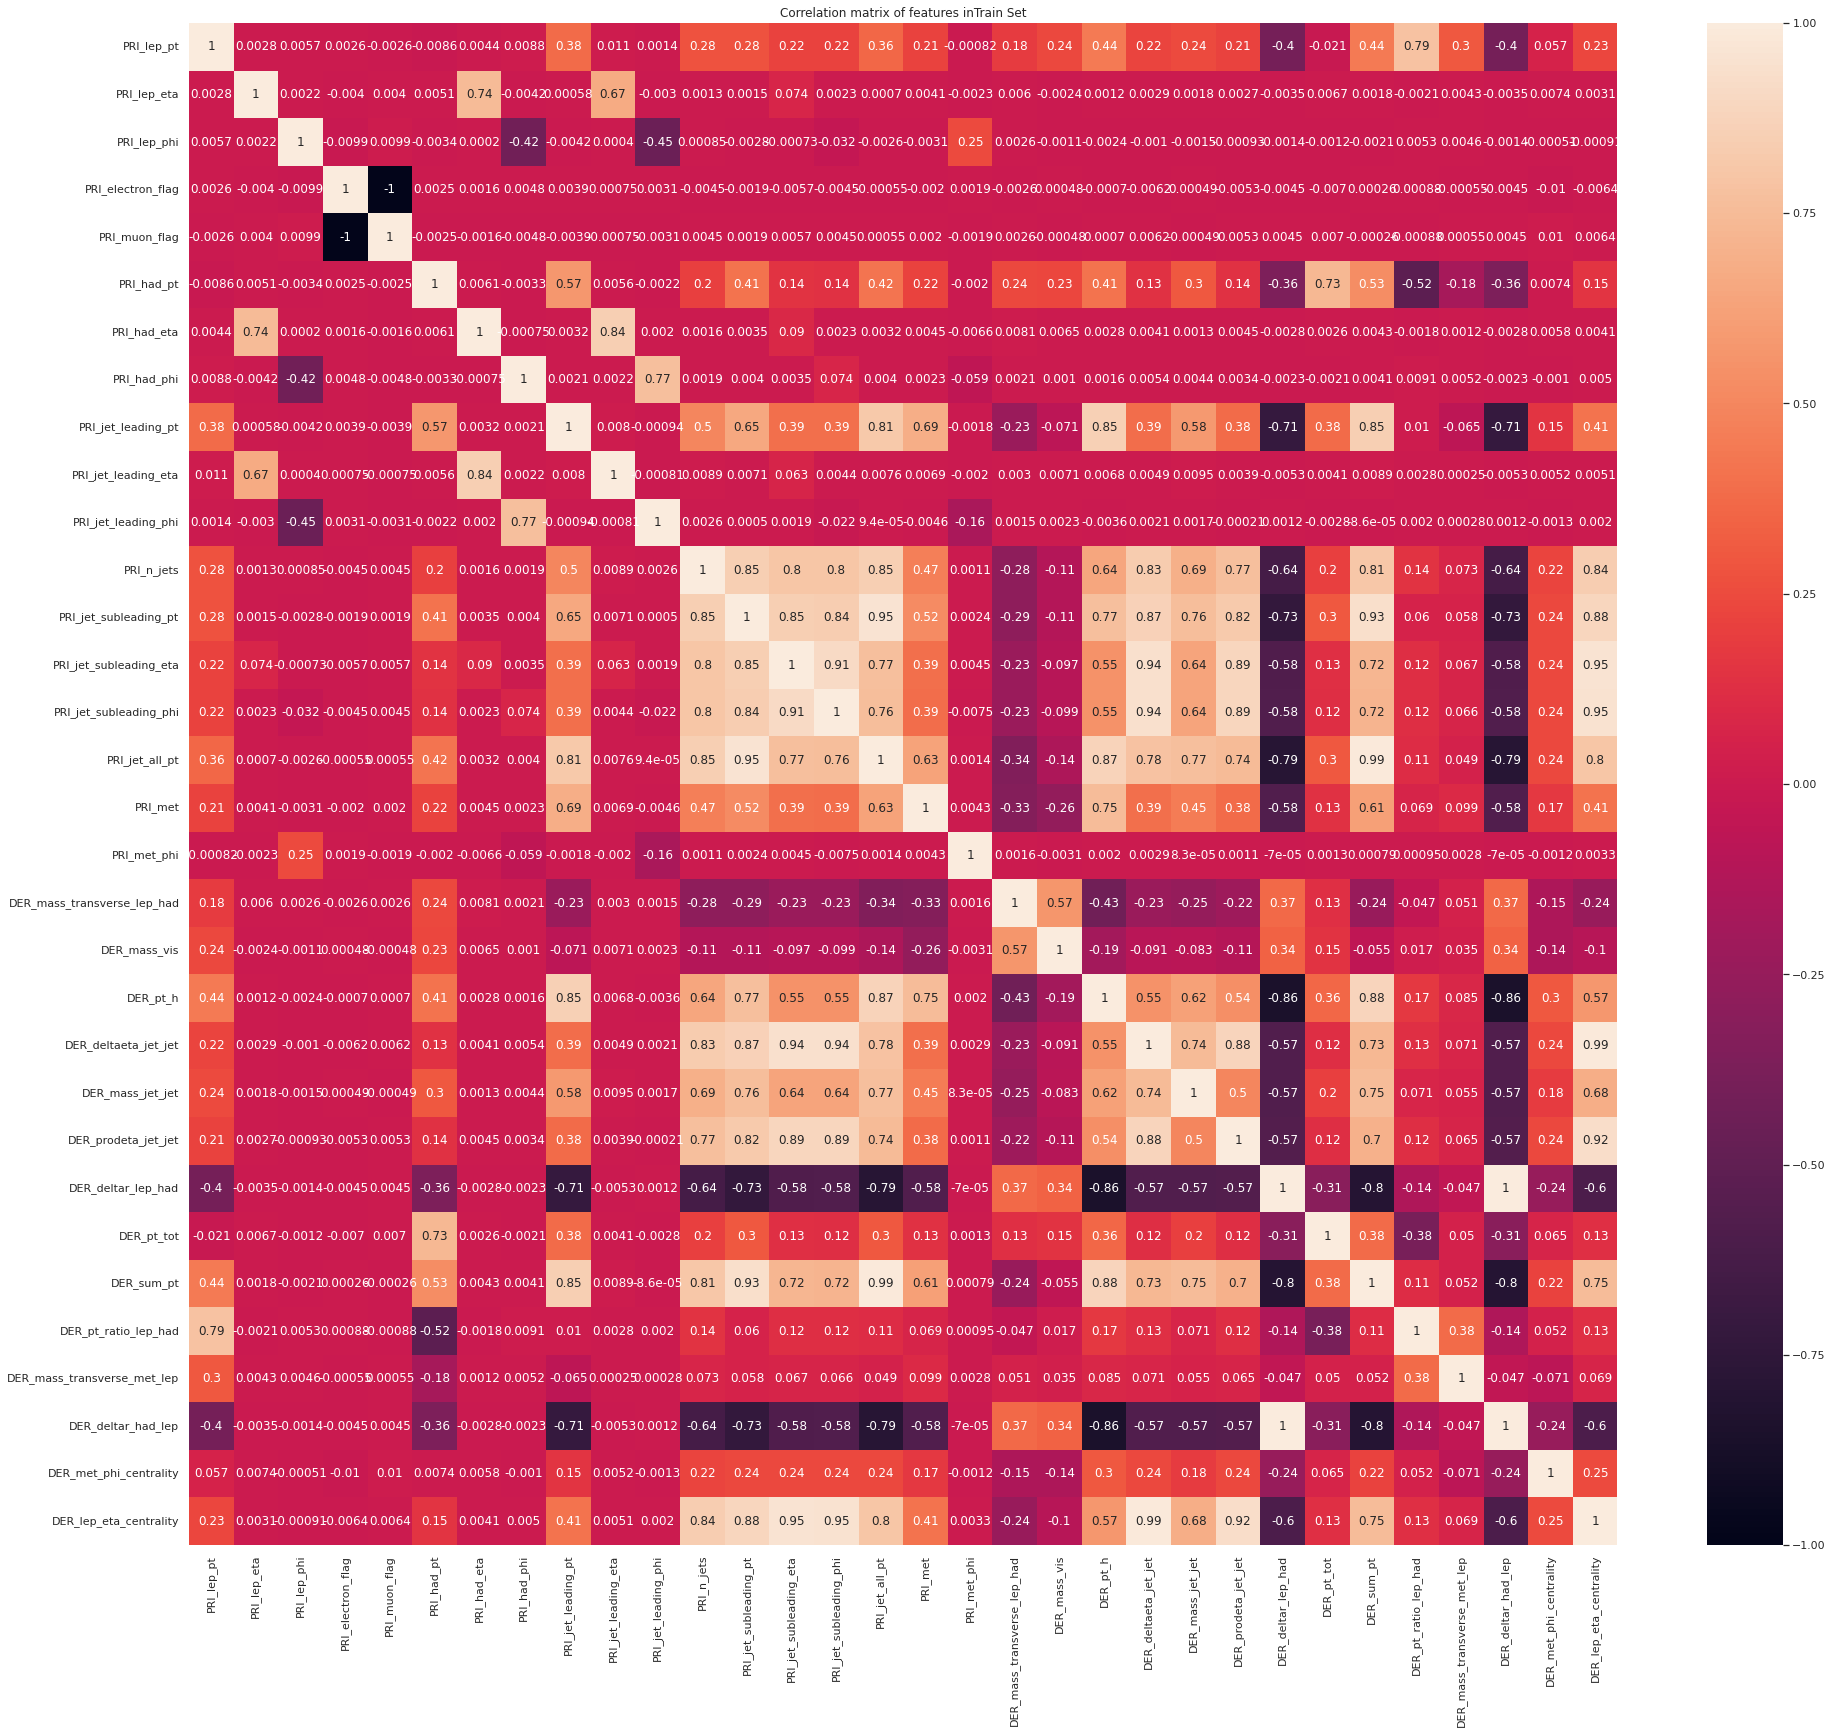

Background feature  correlation matrix


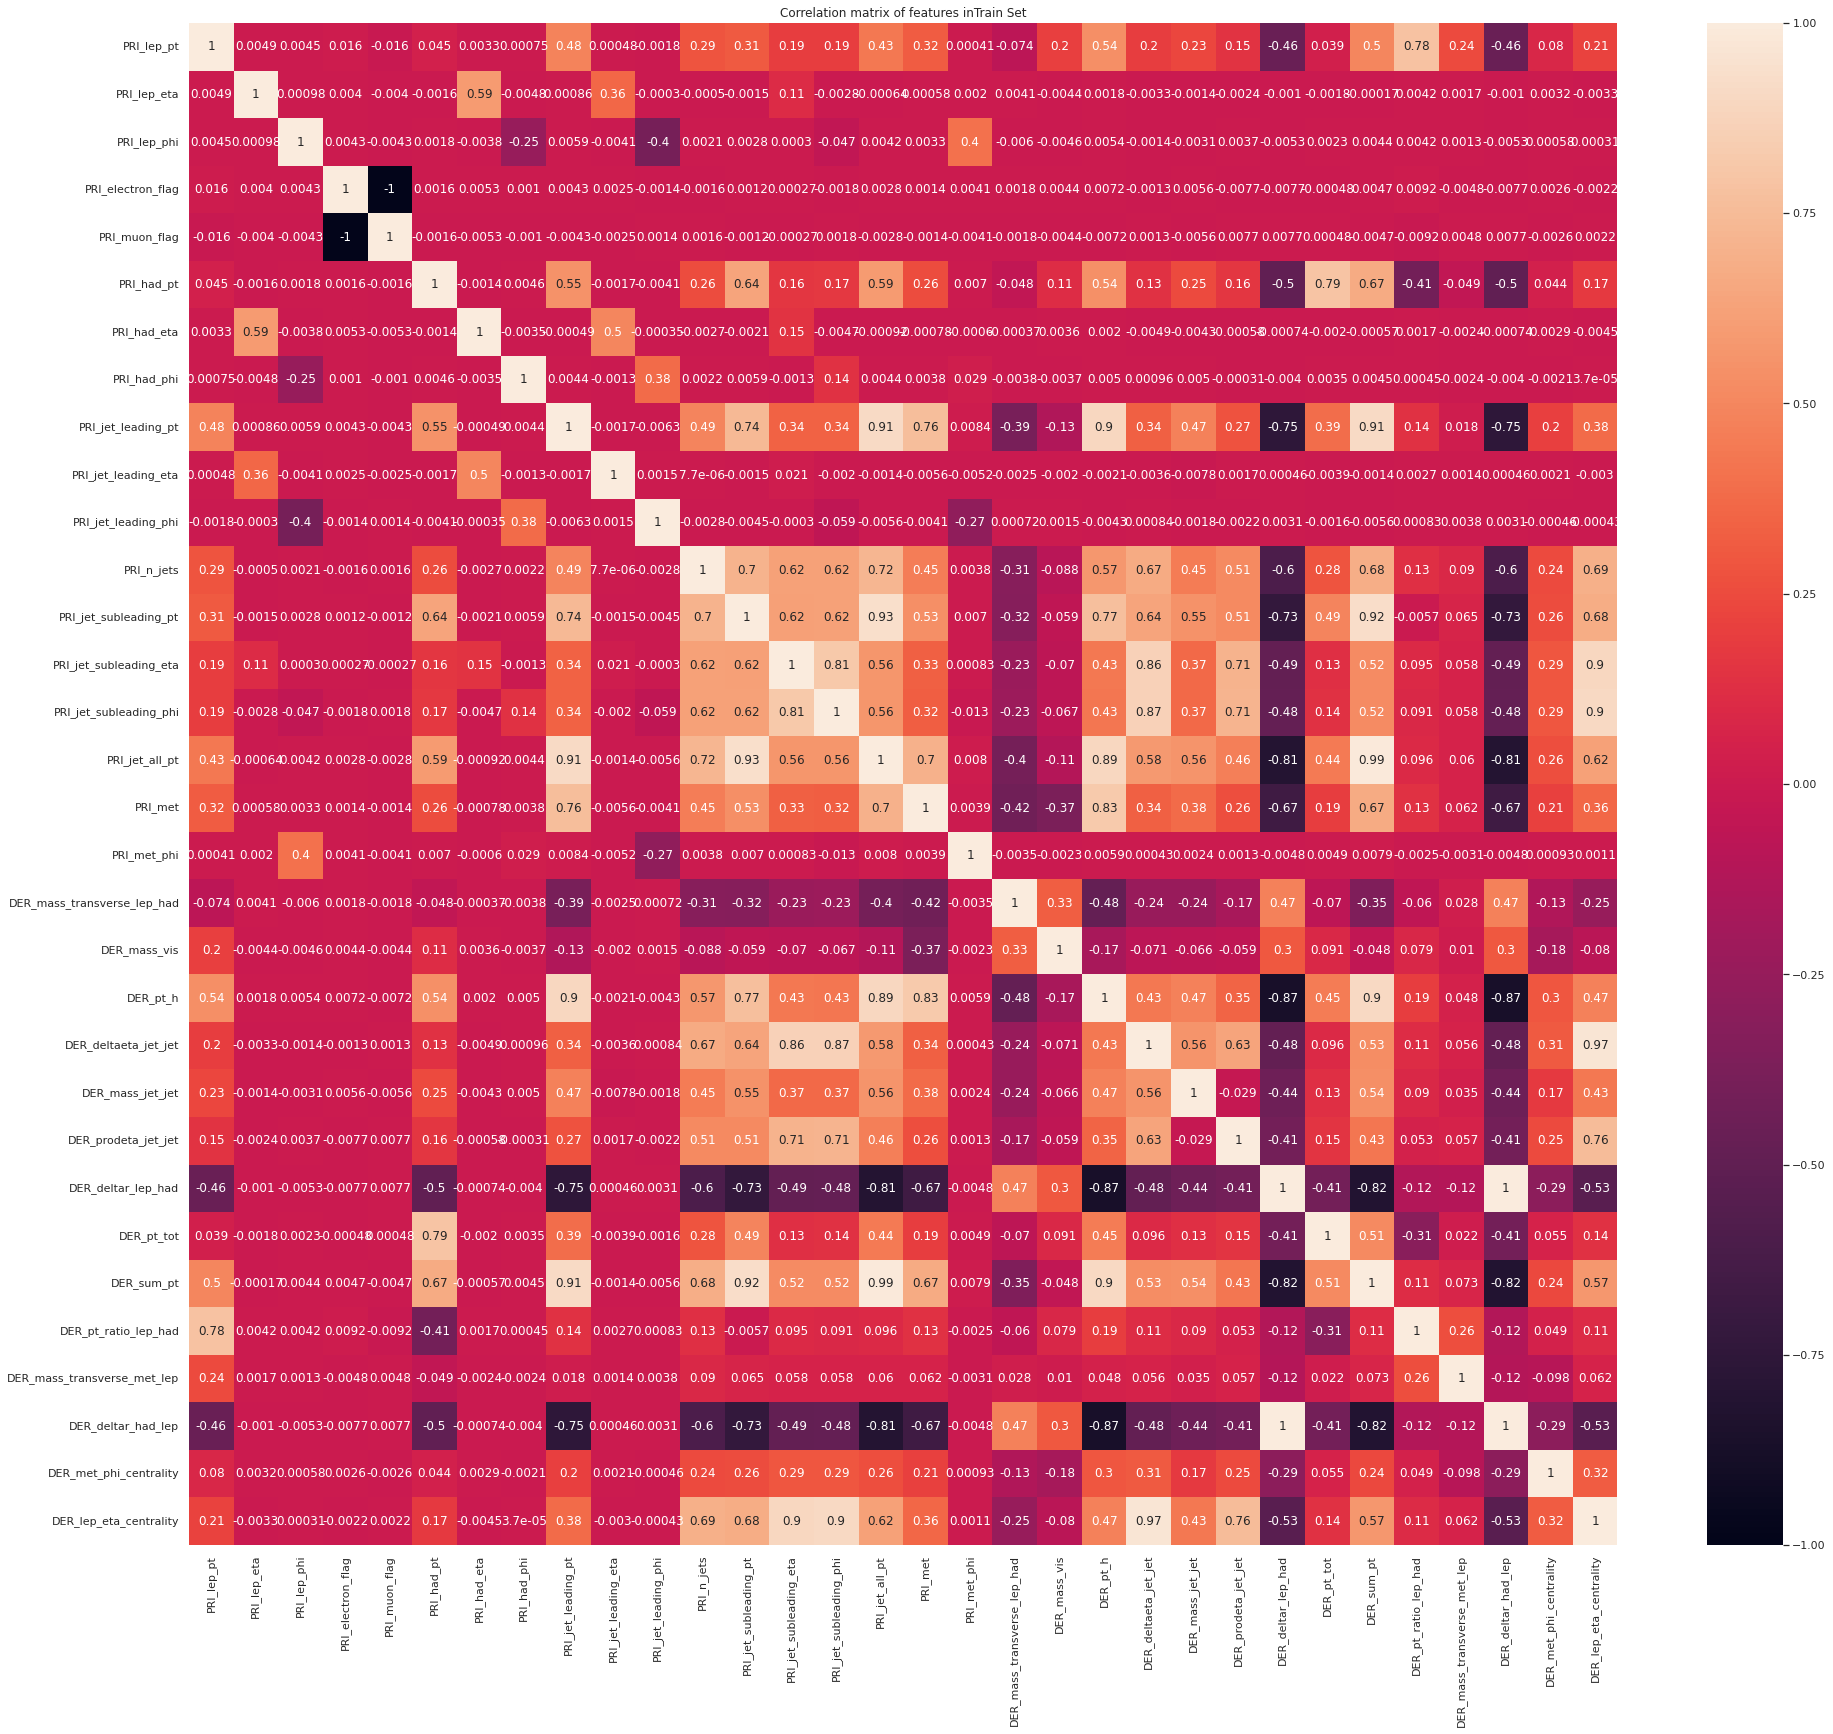

In [10]:
Train_data_vis.correlation_plots()

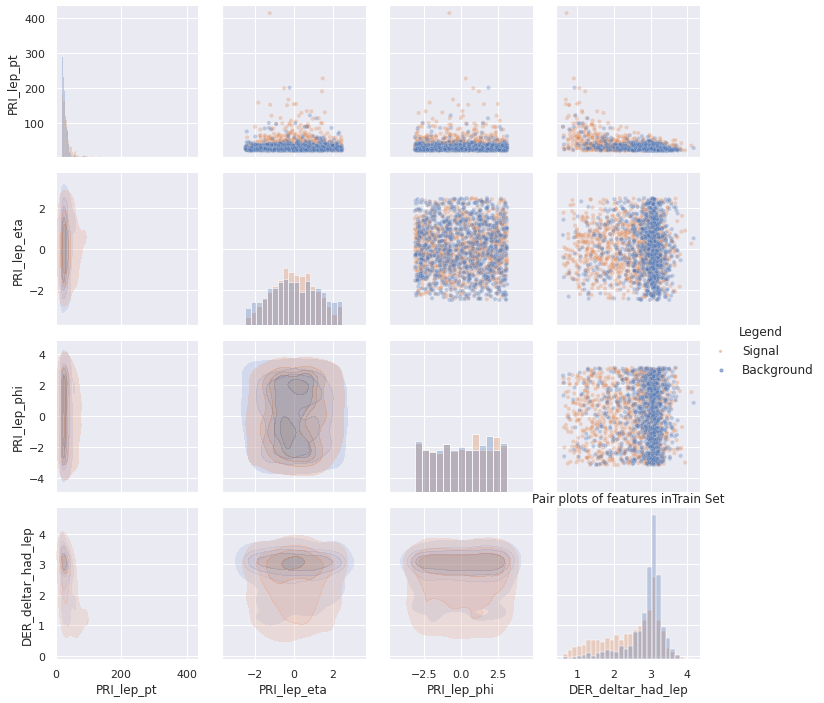

In [13]:
Train_data_vis.pair_plots(columns = ['PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'DER_deltar_had_lep'])
 

In [ ]:
# for i in range(10):
#     Test_data_vis = Dataset_visualise(ingestion.test_sets[i],ingestion.test_sets_weights[i],ingestion.test_labels[i],f"Test Set {i} ")
#     Test_data_vis.examine_dataset()
#     Test_data_vis.histogram_dataset()
#     Test_data_vis.correlation_plots()
#     Test_data_vis.pair_plots()
 

## Training Model

In [14]:
# Initialize submission
ingestion.initialize_submission()

# Call fit method of submission
ingestion.fit_submission()

# Call predict method of submission
ingestion.predict_submission()

model = ingestion.model

[*] Initializing submitted model
[*] Calling fit method of submitted model
[*] - Generating Validation sets
Tau energy rescaling : 0.97
Tau energy rescaling : 0.93
Tau energy rescaling : 0.94
Tau energy rescaling : 0.92
Tau energy rescaling : 0.99
Tau energy rescaling : 0.91
Tau energy rescaling : 1.01
Tau energy rescaling : 0.98
Tau energy rescaling : 0.93
Tau energy rescaling : 1.0
[*] - Intialize BDT
[*] - Train Neural Network
[*] - Intialize BDT
[*] --- Training Model
[*] --- Fitting Model
sum of signal 2860861.8102000006
sum of background 2860861.8102
[*] --- Predicting Train set
[*] --- AUC train : 0.8593376129051431
[*] Choose best theta

[*] --- nu_roi: 2870527.8620537147 --- beta_roi: 2860861.8102000006 --- gamma_roi: 9666.051853713998 --- sigma squared: 0.03072299324798441

[*] --- nu_roi: 2861913.5210315576 --- beta_roi: 2852251.6531421267 --- gamma_roi: 9661.86788943018 --- sigma squared: 0.03065732914868516

[*] --- nu_roi: 1696886.45674553 --- beta_roi: 1688103.260157017 

## Visualise Model

In [ ]:
roc_curve_(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name,color='b',lw = 2)

events_histogram(model.train_set['score'],model.train_set['labels'] ,model.train_set['weights'],plot_label = model.model_name + " Train Set")

score_histogram(model.train_set['score'],model.train_set['labels'] ,plot_label = model.model_name + " Train Set")


In [ ]:
i = 0
for test_set in model.test_sets:
    roc_curve_(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" Train Set {i}",color='b',lw = 2)

    events_histogram(test_set['score'],test_set['labels'] ,test_set['weights'],plot_label = model.model_name + f" Train Set {i}")

    score_histogram(test_set['score'],test_set['labels'] ,plot_label = model.model_name + f" Train Set {i}")
    i = i + 1

In [ ]:
# Save result
ingestion.save_result()

# Stop timer
ingestion.stop_timer()

# Show duration
ingestion.show_duration()

## End